In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

In [ ]:
# Define data generators for train, validation and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Brain_Tumor_Detection (1)/test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 2660 images belonging to 2 classes.
Found 664 images belonging to 2 classes.
Found 60 images belonging to 1 classes.


In [ ]:
# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(train_generator,validation_data=val_generator,epochs=2)

Epoch 1/2
84/84 [==============================] - 856s 10s/step - loss: 0.1218 - accuracy: 0.9741 - val_loss: 0.0439 - val_accuracy: 0.9759
Epoch 2/2
84/84 [==============================] - 328s 4s/step - loss: 0.0403 - accuracy: 0.9771 - val_loss: 0.0577 - val_accuracy: 0.9819


In [ ]:
model.save("Model.h5","label.txt")

In [ ]:
#test your image
from tensorflow.keras.models import load_model # TensorFlow is required for Keras to work
from tensorflow.keras.preprocessing import image
import numpy as np

#load the model
model = load_model('/content/Model.h5')
#Load and preprocess the test image
test_image_path='/content/drive/MyDrive/train/NORMAL/IM-0143-0001.jpeg'
img=image.load_img(test_image_path,target_size=(224,224))
imag_array=image.img_to_array(img)
imag_array=np.expand_dims(imag_array,axis=0)
imag_array /=255.
prediction=model.predict(imag_array)
#print the prediction
if prediction<0.5:
  print("Prediction:No pneumonia(probability:",prediction[0][0],")")
else:
  print("Prediction:pneumonia present(Probability:",prediction[0][0],")")


1/1 [==============================] - 0s 115ms/step
Prediction:No pneumonia(probability: 0.49791142 )


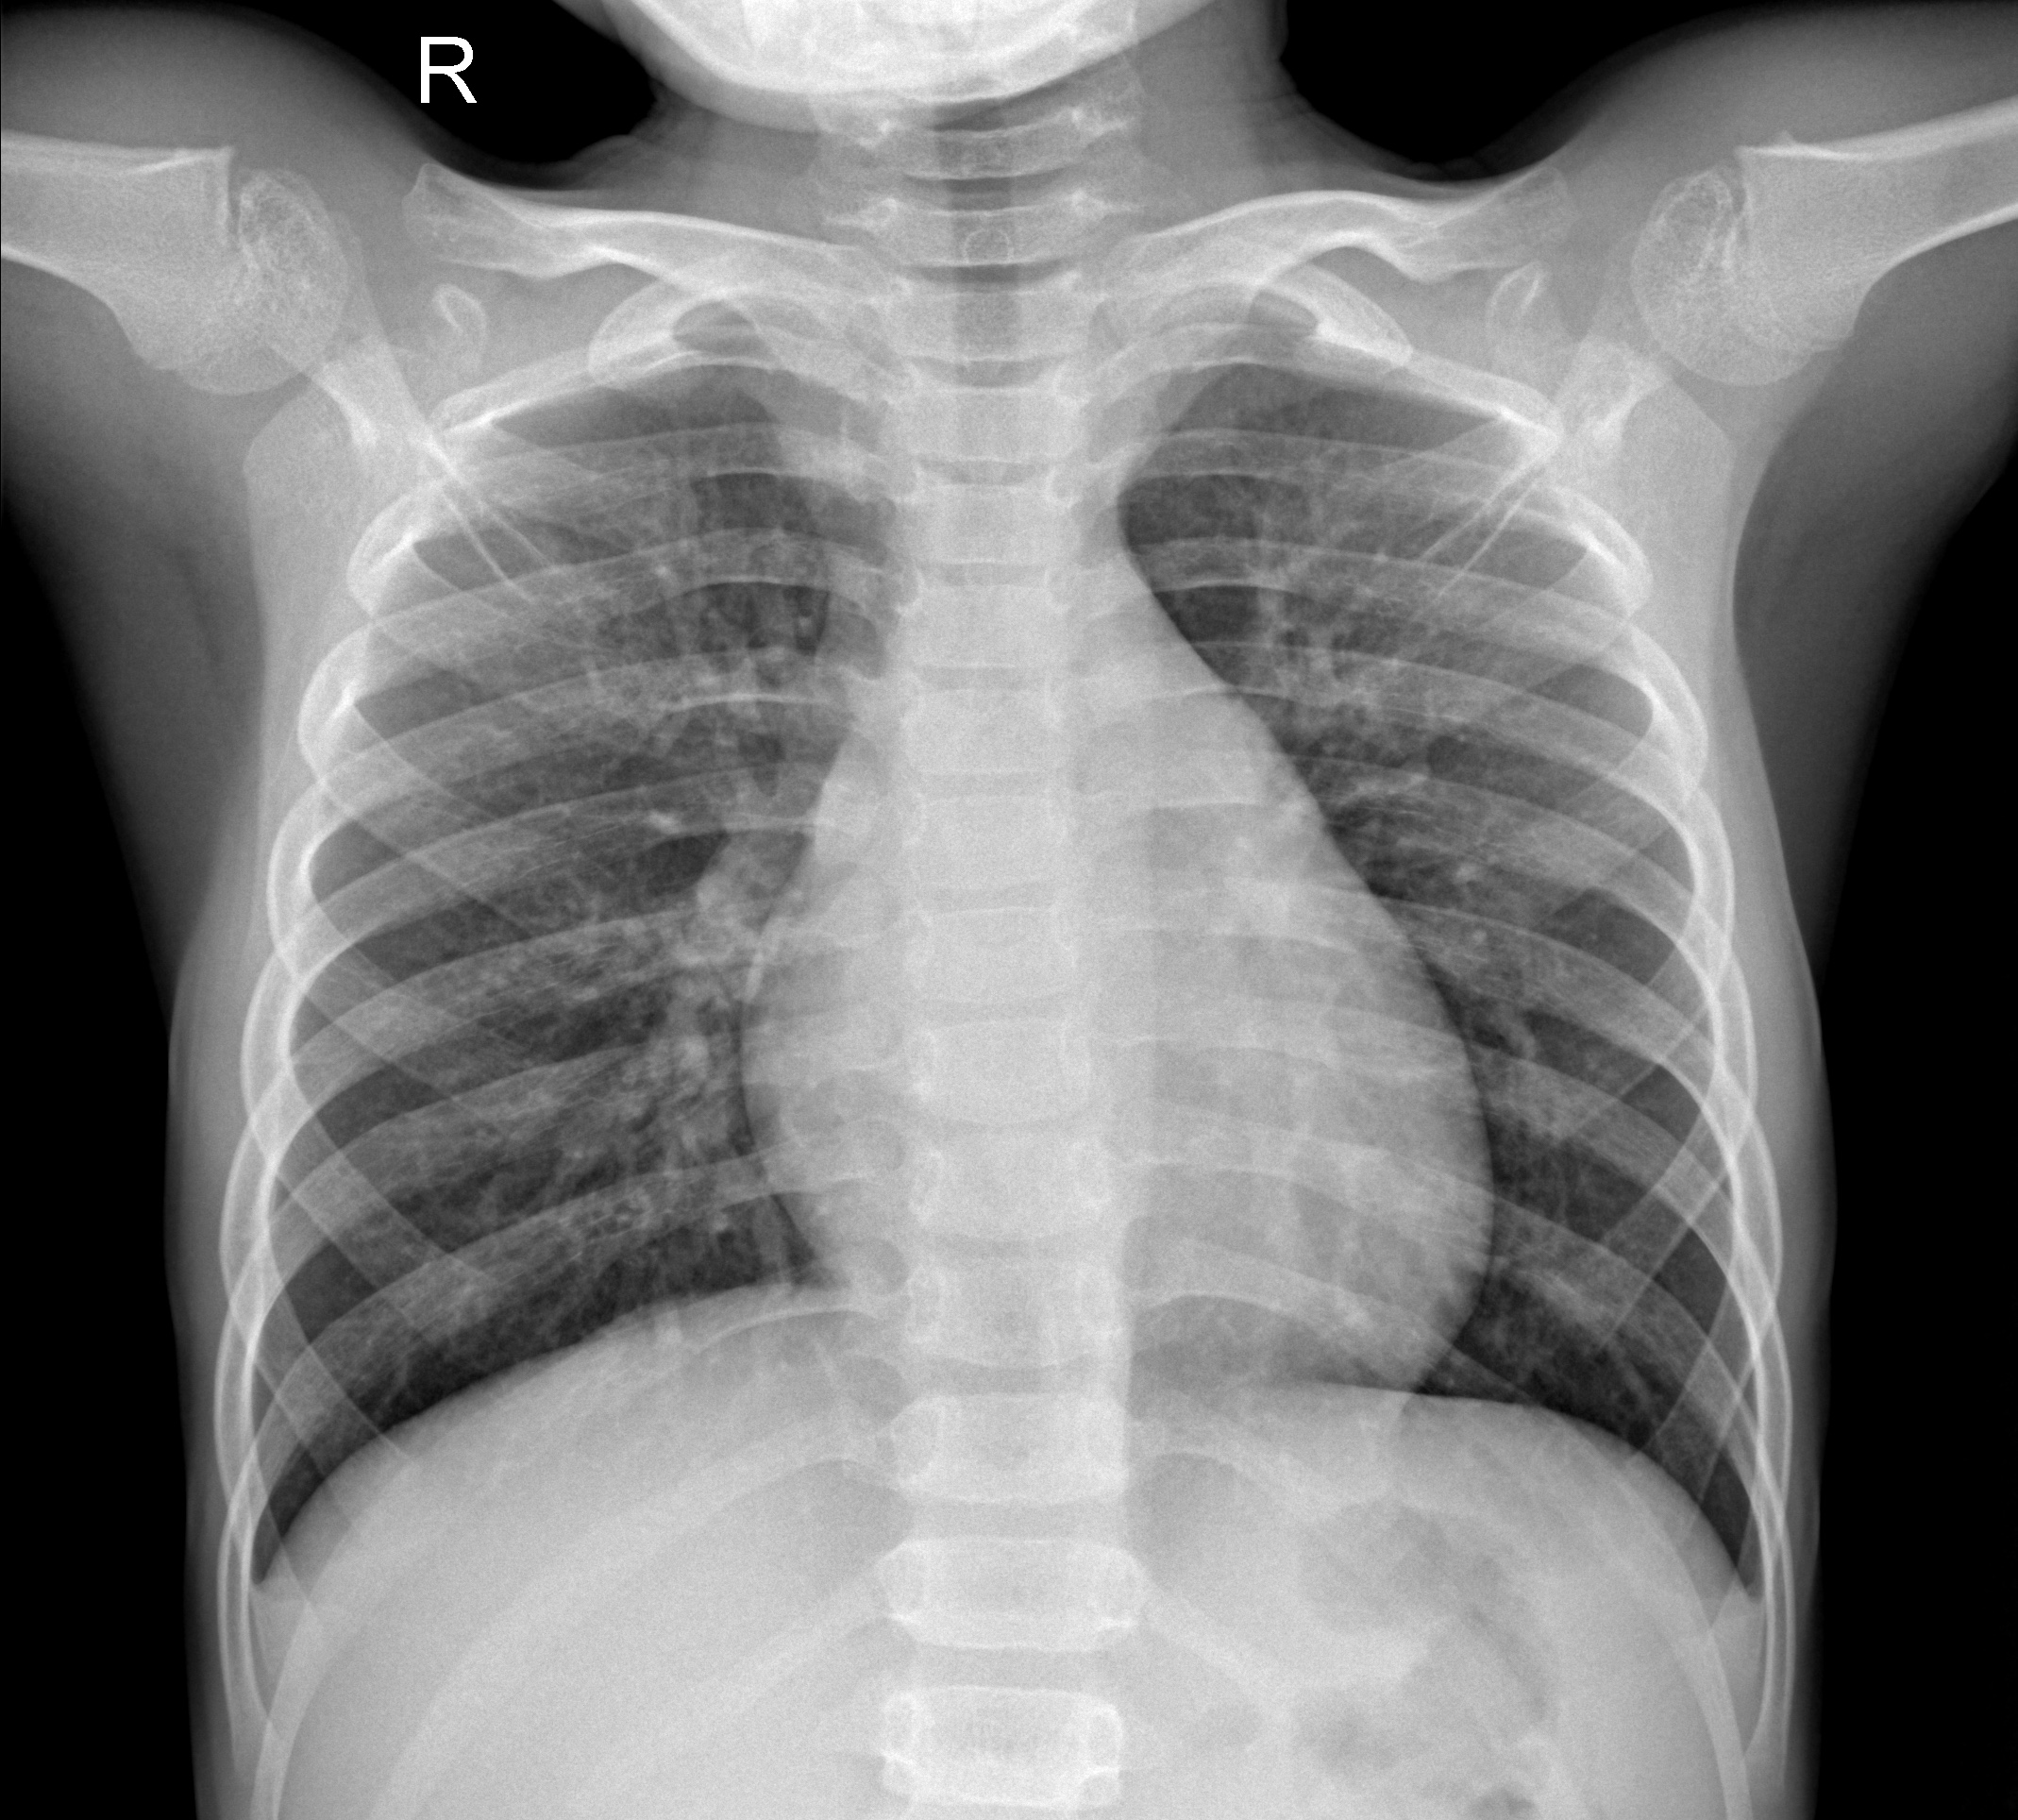

In [ ]:
from PIL import Image
from IPython.display import display
# Open the image file
image_path = '/content/drive/MyDrive/train/NORMAL/IM-0143-0001.jpeg'  # Replace 'your_image.jpg' with the path to your image file
image = Image.open(image_path)
# Display the image
display(image)

In [ ]:
# Upload an audio file
uploaded = files.upload()

NameError: name 'files' is not defined

In [ ]:
!pip install librosa


In [ ]:
import librosa

# Load audio file
audio_path = list(uploaded.keys())[0]  # Get the path of the uploaded file
audio_data, sr = librosa.load(audio_path, sr=None)


NameError: name 'uploaded' is not defined

In [ ]:
print("Audio Data Shape:", audio_data.shape)

NameError: name 'audio_data' is not defined

In [ ]:
from google.colab import files
# Upload an audio file
uploaded = files.upload()

Saving 1708511937638upmkyz6-voicemaker.in-speech.mp3 to 1708511937638upmkyz6-voicemaker.in-speech.mp3


In [ ]:
from IPython.display import Audio

# Path to your audio file
audio_path = '/content/drive/MyDrive/Audio/pneumonia present.mp3'

# Display the audio
Audio(audio_path)

In [ ]:
!pip install reportlab
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# Assuming you have the prediction value
prediction = 0.75  # Replace with the actual prediction value

# Create a PDF document
pdf_path = "medical_report.pdf"
c = canvas.Canvas(pdf_path, pagesize=letter)

# Write prediction results to the PDF
if prediction < 0.5:
    prediction_text = "Prediction: No pneumonia (probability: {}, u r safe)".format(prediction)
else:
    prediction_text = "Prediction: Pneumonia (probability: {}, consult the doctor)".format(prediction)

c.drawString(100, 700, prediction_text)

# Save the PDF document
c.save()

print("Medical report saved as:", pdf_path)

Medical report saved as: medical_report.pdf
